In [101]:
#Basic Data Insights
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [102]:
df = pd.read_csv("C:\\Users\\Inspiron\\Downloads\\SampleSuperstore.csv")

In [103]:
df.sample(5)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
3909,Standard Class,Home Office,United States,Philadelphia,Pennsylvania,19143,East,Furniture,Furnishings,7.584,1,0.2,2.3700
8777,First Class,Corporate,United States,Huntsville,Texas,77340,Central,Office Supplies,Paper,41.472,8,0.2,14.5152
9802,Second Class,Consumer,United States,New York City,New York,10024,East,Office Supplies,Binders,3.328,2,0.2,1.2064
2983,Second Class,Consumer,United States,Springfield,Oregon,97477,West,Office Supplies,Storage,53.424,3,0.2,4.6746
6043,Second Class,Corporate,United States,Knoxville,Tennessee,37918,South,Furniture,Chairs,314.352,3,0.2,-35.3646


In [104]:
df.tail()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.248,3,0.2,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.960,2,0.0,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.576,2,0.2,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.600,4,0.0,13.3200
9993,Second Class,Consumer,United States,Westminster,California,92683,West,Office Supplies,Appliances,243.160,2,0.0,72.9480


In [105]:
df.shape

(9994, 13)

In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [107]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


Number of unique values in each column

In [108]:
for i in df.columns:
    print(i,len(df[i].unique()))

Ship Mode 4
Segment 3
Country 1
City 531
State 49
Postal Code 631
Region 4
Category 3
Sub-Category 17
Sales 5825
Quantity 14
Discount 12
Profit 7287


Check for null values

In [109]:
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

Data Visualization

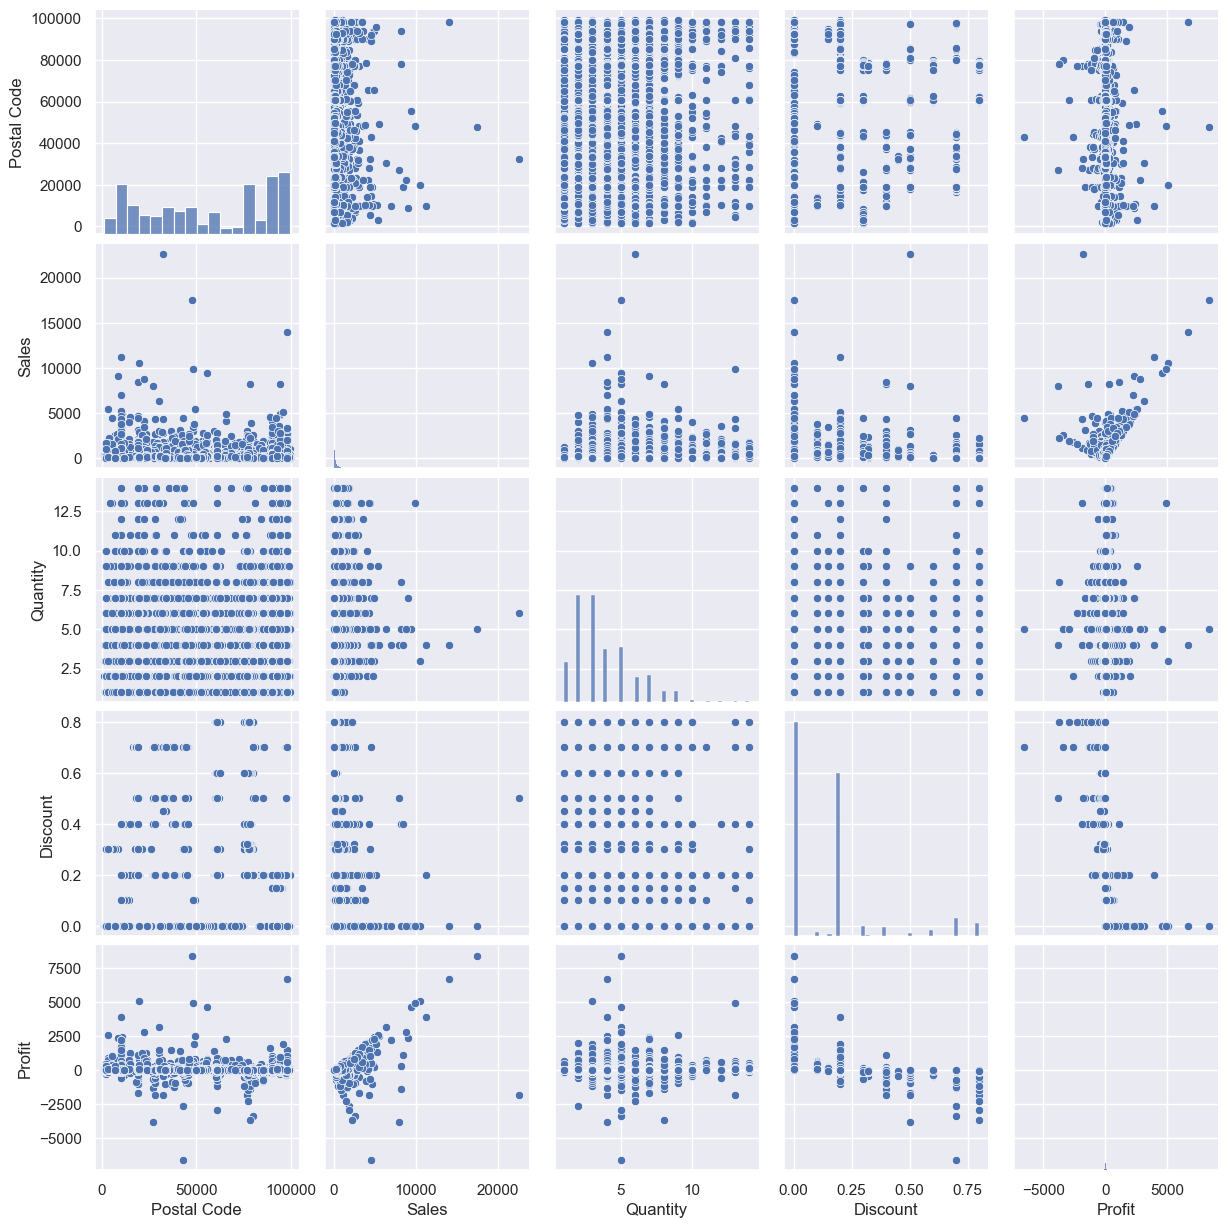

In [110]:
sns.pairplot(df)

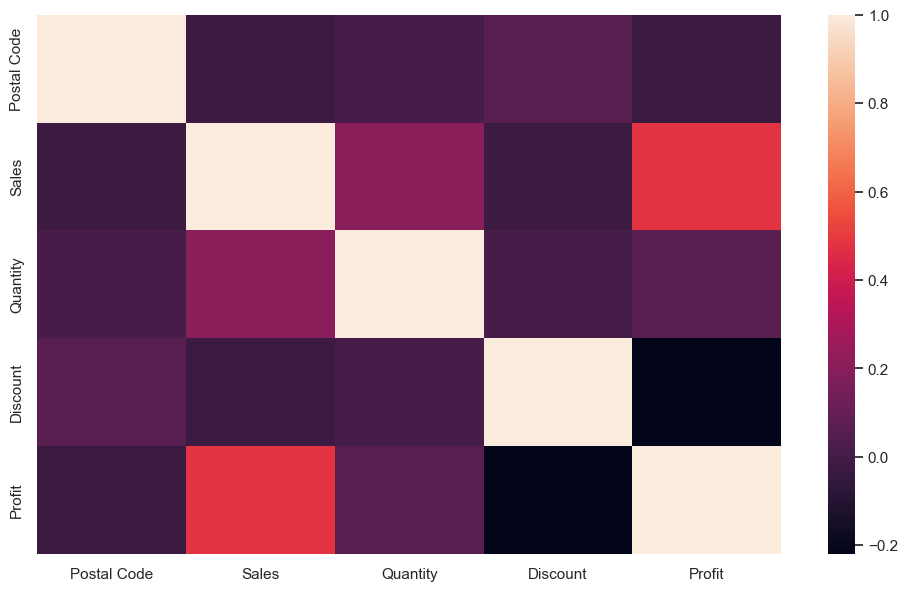

In [86]:
fig,axes = plt.subplots(1,1,figsize=(12,7))
sns.heatmap(df.corr())
plt.show()

In [111]:
df['Region'].value_counts()

West       3203
East       2848
Central    2323
South      1620
Name: Region, dtype: int64

<Axes: xlabel='Region', ylabel='count'>

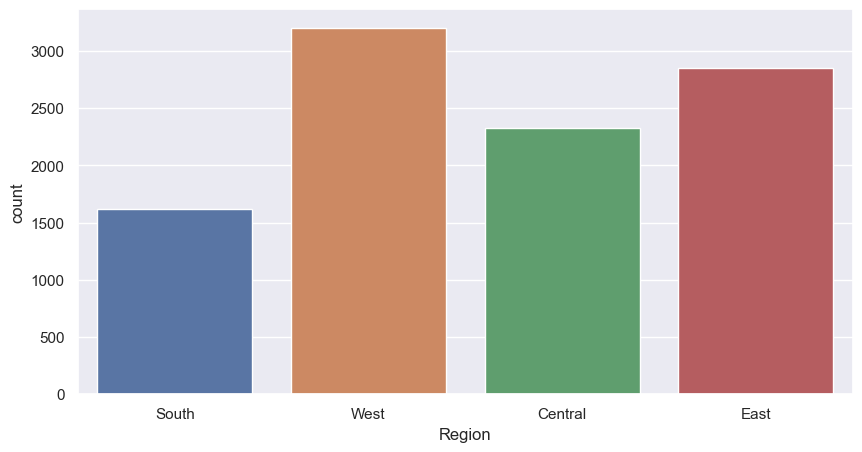

In [88]:
sns.set(rc={'figure.figsize':(10,5)})
sns.countplot(x=df['Region'])

In [112]:
df['Segment'].value_counts()

Consumer       5191
Corporate      3020
Home Office    1783
Name: Segment, dtype: int64

<Axes: xlabel='Segment', ylabel='count'>

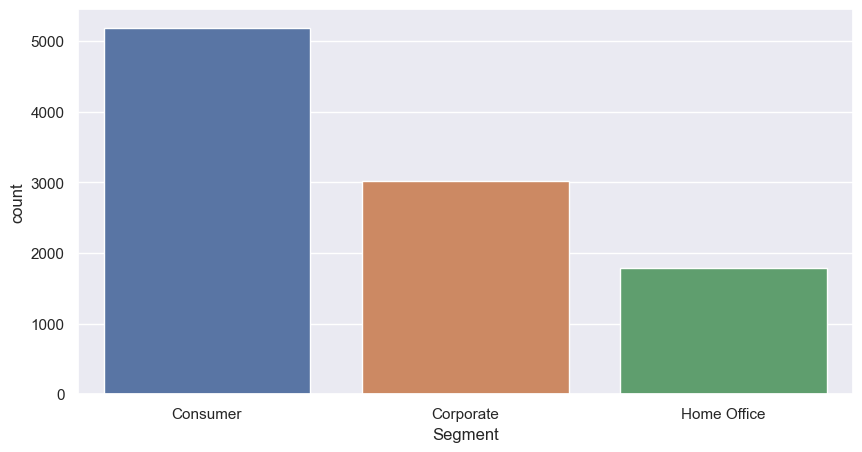

In [90]:
sns.set(rc={'figure.figsize':(10,5)})
sns.countplot(x=df['Segment'])


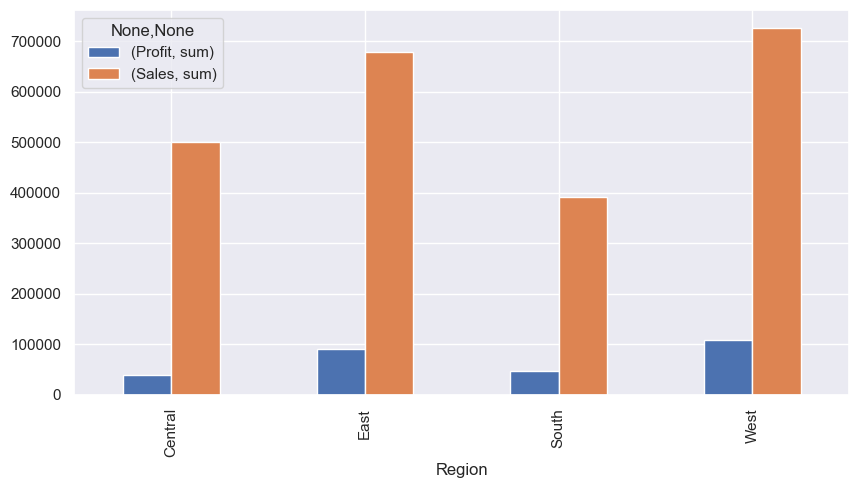

In [91]:
df.groupby('Region')['Profit','Sales'].agg(['sum']).plot.bar()
plt.rcParams['figure.figsize']=[5,15]
plt.show()

In [113]:
df_shipmode=df[['Ship Mode','Category','Quantity']].groupby(['Ship Mode','Category']).sum('Quantity')
df_shipmode

Quantity
Ship Mode      Category                 
First Class    Furniture            1238
               Office Supplies      3372
               Technology           1083
Same Day       Furniture             453
               Office Supplies      1147
               Technology            360
Second Class   Furniture            1569
               Office Supplies      4480
               Technology           1374
Standard Class Furniture            4768
               Office Supplies     13907
               Technology           4122

<Axes: xlabel='Ship Mode,Category'>

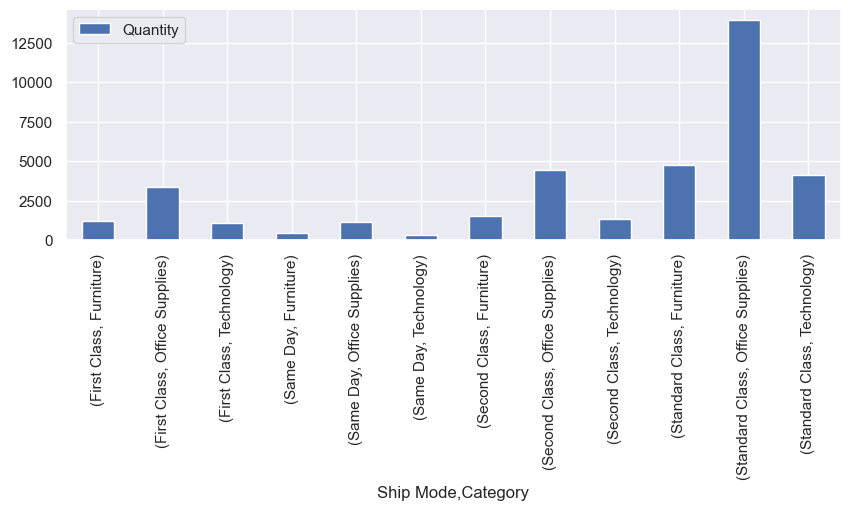

In [93]:
df_shipmode.plot(kind='bar',figsize=(10,3))

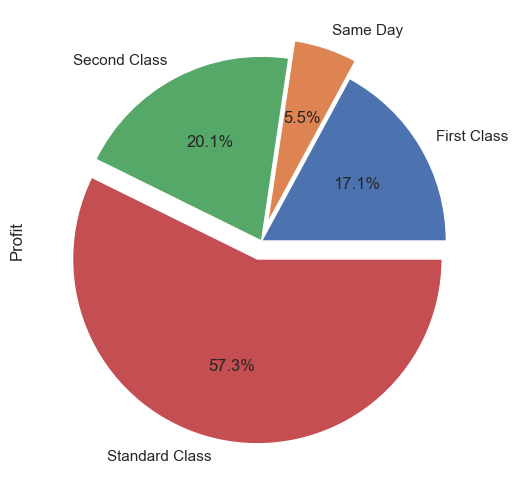

In [94]:
plt.figure(figsize=(10,6))
df.groupby('Ship Mode').Profit.sum().plot.pie(autopct='%1.1f%%',explode=(0,0.1,0,0.1),shadow=False)
plt.show()

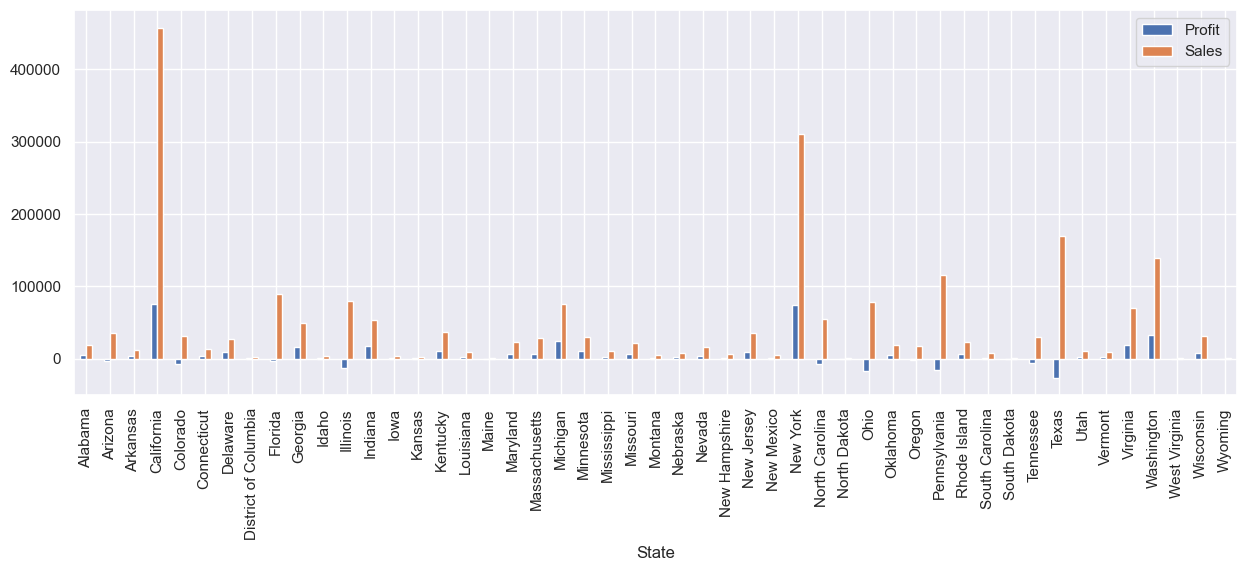

In [114]:
df.groupby('State')['Profit','Sales'].sum().plot.bar(figsize=(15,5))
plt.show()

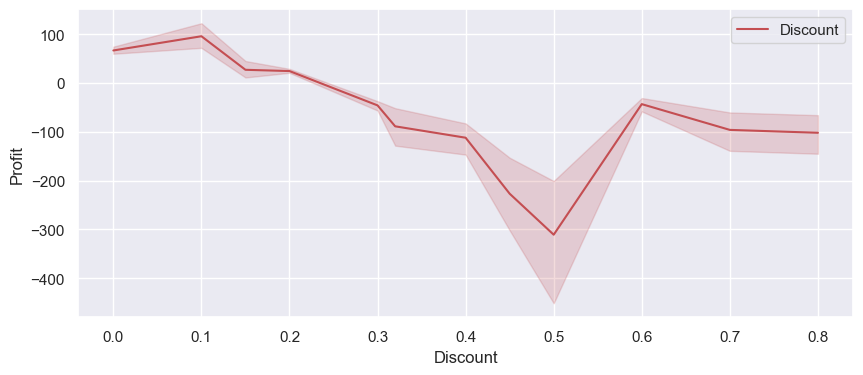

In [116]:
plt.figure(figsize=(10,4))
sns.lineplot(x='Discount',y='Profit',data=df,color='r',label='Discount')
plt.legend()

In [97]:
df['Sub-Category'].value_counts()

Binders        1523
Paper          1370
Furnishings     957
Phones          889
Storage         846
Art             796
Accessories     775
Chairs          617
Appliances      466
Labels          364
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: Sub-Category, dtype: int64

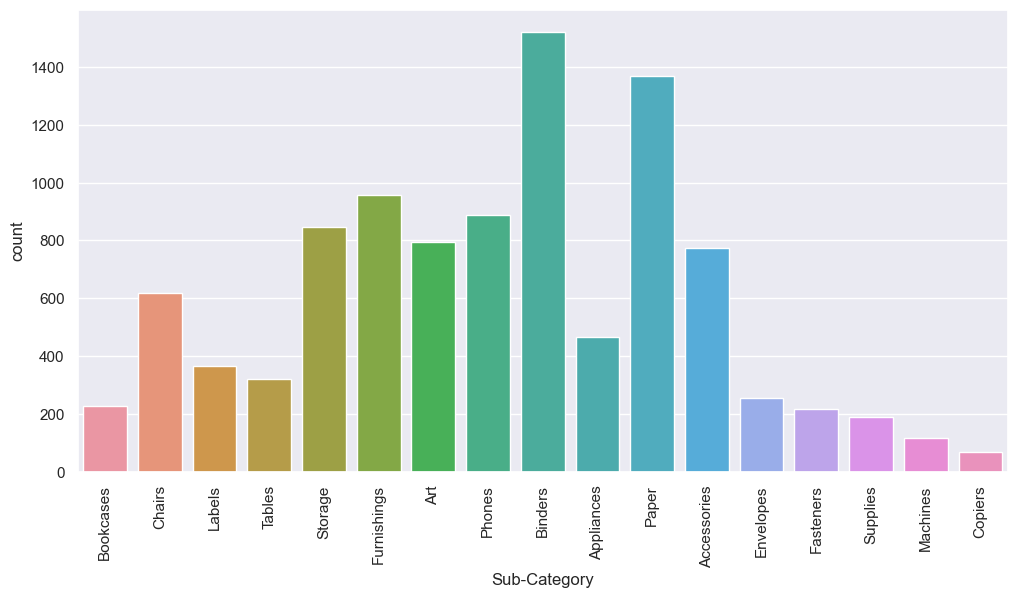

In [98]:
plt.figure(figsize=(12,6))
sns.countplot(x=df['Sub-Category'])
plt.xticks(rotation=90)
plt.show()

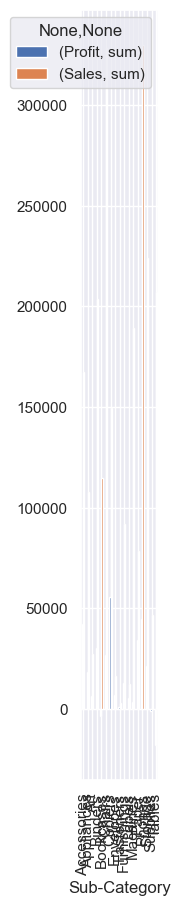

In [100]:
df.groupby('Sub-Category')['Profit','Sales'].agg(['sum']).plot.bar()
plt.rcParams['figure.figsize']=[1,10]
plt.show()